In [2]:
import numpy as np
import pandas as pd  

import matplotlib.pyplot as plt 
%matplotlib inline  

from matplotlib.pyplot import rcParams 
rcParams['figure.figsize']=20,10 
from keras.models import Sequential 
from keras.layers import LSTM,Dropout,Dense 

from sklearn.preprocessing import MinMaxScaler


In [3]:
df=pd.read_csv("data/SPY.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-19,339.049988,339.609985,336.619995,337.230011,332.280823,68054200
1,2020-08-20,335.359985,338.799988,335.220001,338.279999,333.315430,42207800
2,2020-08-21,337.920013,339.720001,337.549988,339.480011,334.497833,55106600
3,2020-08-24,342.119995,343.000000,339.450012,342.920013,337.887360,48588700
4,2020-08-25,343.529999,344.209991,342.269989,344.119995,339.069702,38463400


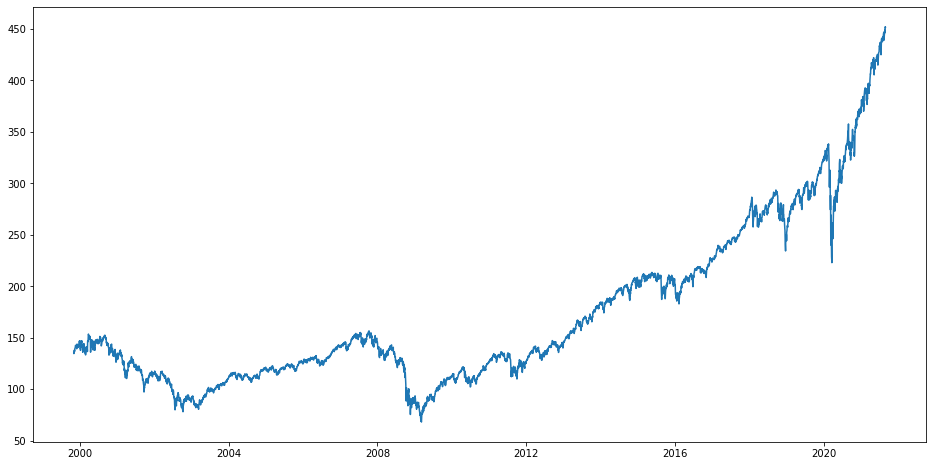

In [12]:

df["Date"]=pd.to_datetime(df.date,format="%Y-%m-%d")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["4. close"],label='Close Price history')

In [13]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

In [15]:
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['date'][i]
    new_dataset["Close"][i]=data["4. close"][i]
    

new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

final_dataset=new_dataset.values

In [16]:
train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

In [17]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

In [18]:
x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [19]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

In [20]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

927/927 - 97s - loss: 2.7486e-04


In [21]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

In [22]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=lstm_model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


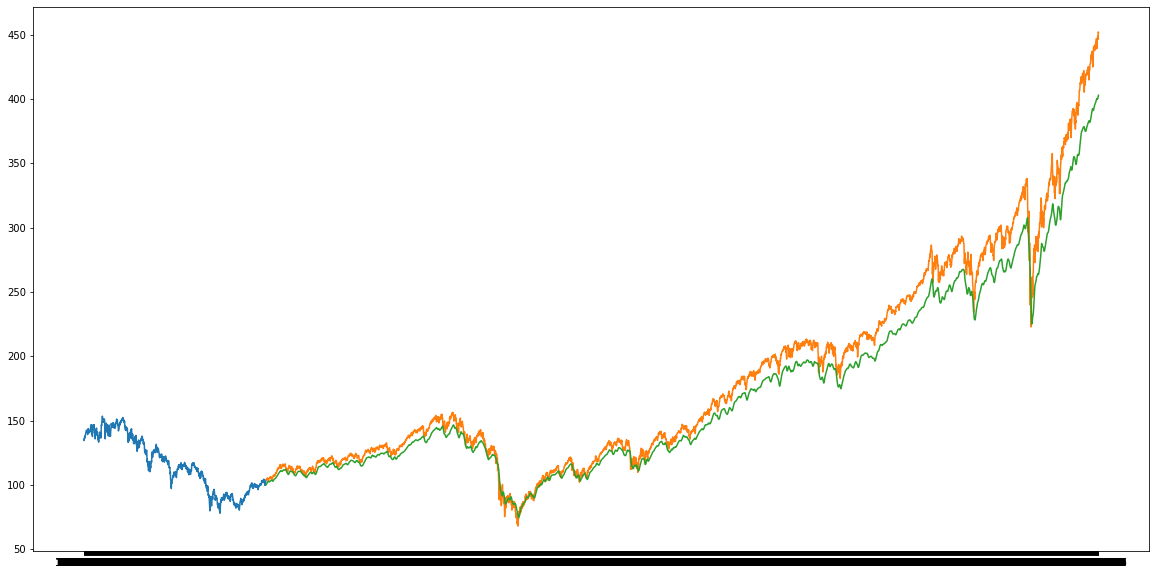

In [23]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])